In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
(x_trn, y_trn), (x_tst, y_tst) = mnist.load_data()
train_filter = np.where((y_trn == 0) | (y_trn == 1))
test_filter = np.where((y_tst == 0) | (y_tst == 1))
x_trn, y_trn = x_trn[train_filter], y_trn[train_filter]
x_tst, y_tst = x_tst[test_filter], y_tst[test_filter]
print(x_trn.shape)
print(y_trn.shape)
print(x_tst.shape)
print(y_tst.shape)

(12665, 28, 28)
(12665,)
(2115, 28, 28)
(2115,)


In [4]:
x_train = np.array(x_trn, np.float32)
x_test = np.array(x_tst, np.float32)

x_train = x_train.reshape([-1, 784])
x_test = x_test.reshape([-1, 784])

x_train = x_train / 255.0
x_test = x_test / 255.0

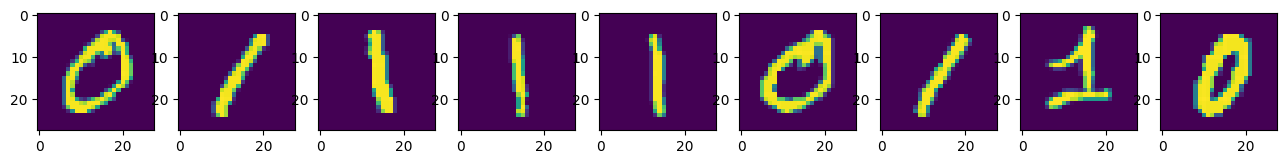

In [5]:
fig, axs = plt.subplots(1, 9, figsize = (16, 8))
for i in range(9):
    axs[i].imshow(x_trn[i]) 

In [6]:
weigths = []
for _ in range(len(x_train[0])):
    weigths.append(random.randint(-5, 5))
weigths = np.array(weigths, np.float32)
w_0 = random.randint(-5, 5)
print(weigths)

[-2.  1. -3.  0. -5. -2.  2.  2.  1.  5.  3. -1. -1. -1. -1.  3.  3.  3.
  0.  3. -3. -3.  5.  4.  1. -4.  4. -3. -5. -1. -5.  2. -1. -1. -5.  4.
  1.  1.  3. -1.  5.  1.  2.  1. -3. -1. -4.  2. -3. -1.  0. -1.  2.  3.
 -1.  3.  1. -4.  4. -4.  3.  1.  0.  5. -2.  3.  5. -5. -1.  5.  3. -5.
  0.  4.  5.  3.  2. -4. -5.  5.  4. -2. -2. -3. -4. -5.  4.  3.  1. -3.
  1. -4. -2. -3.  0. -2. -3. -5. -5.  0. -4.  5. -4.  2. -5.  3. -1. -1.
  5. -5.  0. -2.  3. -4. -2.  3. -4. -3. -3.  0. -2. -2.  0. -4. -5. -3.
  4.  3.  3. -4.  3. -1.  2. -1. -3.  5.  1.  5.  5. -4. -3.  0.  1. -2.
 -1. -1.  4.  1. -5.  5.  0.  0. -4. -5.  3.  3.  1. -4.  1. -5.  0.  2.
  1.  2. -1. -2.  5.  4.  3.  1.  3. -5.  4. -3. -4. -1.  5. -1.  0.  2.
 -1.  2. -4.  1.  2.  1. -4. -4.  3. -3.  5. -2. -4. -5.  0.  1. -2. -1.
 -3.  5.  1. -1.  4. -2.  0.  0. -1.  4. -1. -2.  0.  2.  5. -3.  1. -5.
  2. -2. -2.  0. -3. -2. -2.  0.  0.  2. -4. -4. -2. -2. -1. -4.  1.  4.
 -2.  4. -4.  5.  0.  3. -5. -5.  3. -4. -3.  5.  3

In [7]:
def predict(x, weigths):
    D = np.dot(x, weigths) + w_0
    if D > 0:
        return 0
    else:
        return 1

In [8]:
def train(x_train, y_train, weigths, w_0, epochs):
    isLearning = True
    epoch = 0
    acc = []
    while(isLearning and epoch != epochs):
        epoch += 1
        E = 0
        right_answ_c = 0
        for x_t, y_t in zip(x_train, y_train):
            y_pred = predict(x_t, weigths)
            if y_pred == y_t:
                E += 1
                right_answ_c += 1
                continue
            if y_t == 0 and y_t != y_pred:
                w_0 += 1
                for i in range(len(x_t)):
                    weigths[i] += x_t[i]

            if y_t == 1 and y_t != y_pred:
                w_0 -= 1
                for i in range(len(x_t)):
                    weigths[i] -= x_t[i]
        
        acc.append(right_answ_c/len(y_train))

        if epoch % 10 == 0:
            print('Epoch {0} acc {1}'.format(epoch, E/len(x_train)))
        
        if E == len(x_train):
            isLearning = False
            print('Learning has ended on {} epoch'.format(epoch))  

    return epoch, acc  


In [9]:
epochs, accs = train(x_train, y_trn, weigths, w_0, 1000)

Epoch 10 acc 0.9996052112120016
Learning has ended on 13 epoch


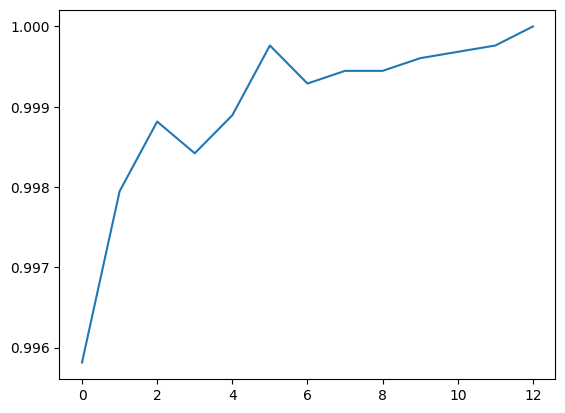

In [10]:
plt.plot(np.arange(epochs), np.array(accs))

In [11]:
acc = 0
for x_t, y_t in zip(x_test, y_tst):
    if predict(x_t, weigths) == y_t:
        acc += 1
        
acc /= len(x_test)
print('Accuracy {}'.format(acc))

Accuracy 0.9981087470449173
